In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv('HealthData.csv')

In [95]:
#Section 1: Data Understanding Process

df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [97]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [99]:
df.shape

(1338, 7)

In [101]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [103]:
df = df.drop_duplicates()

In [105]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [107]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [109]:
#Section 2: EDA Process

In [111]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


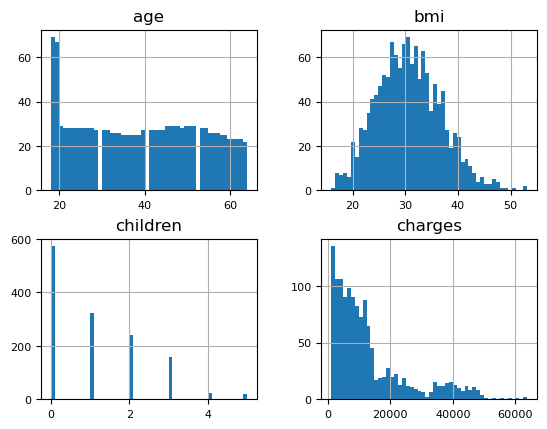

In [113]:
df_num.hist( bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [115]:
#Categorical variables - Univariate

In [119]:
numerical_list = ['age','children','charges','bmi']

In [121]:
df_quant_values = df[numerical_list]
df_quant_values.head()

,age,children,charges,bmi
0,19,0,16884.92400,27.900
1,18,1,1725.55230,33.770
2,28,3,4449.46200,33.000
3,33,0,21984.47061,22.705
4,32,0,3866.85520,28.880


In [123]:
categorical_features = ['sex','smoker','region']
df_categorical_features = df[categorical_features]
df_categorical_features.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [125]:
df_not_num = df_categorical_features.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 3 non numerical features including:
['sex', 'smoker', 'region']


([0, 1], [Text(0, 0, 'female'), Text(1, 0, 'male')])

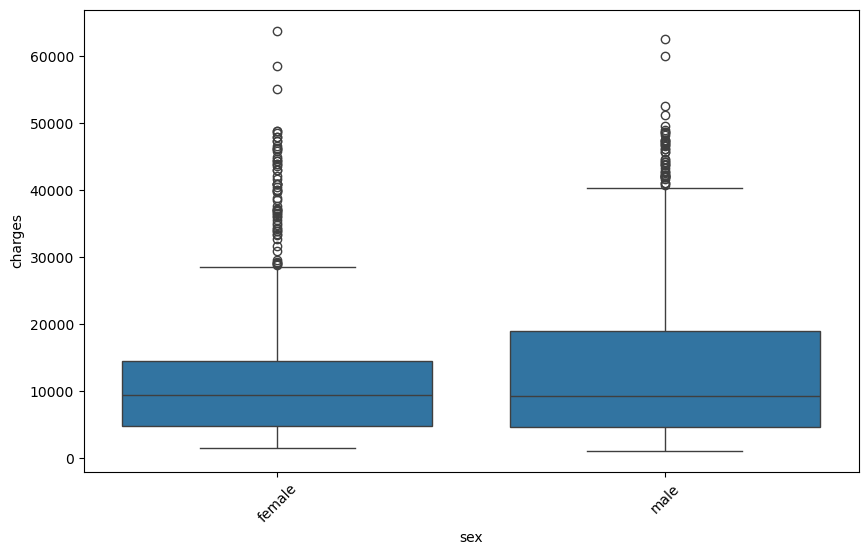

In [127]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='sex', y='charges', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

/var/folders/k4/hdyy7grd3pg83c9594z86g480000gn/T/ipykernel_6604/1593331152.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=20)
/var/folders/k4/hdyy7grd3pg83c9594z86g480000gn/T/ipykernel_6604/1593331152.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=20)
/var/folders/k4/hdyy7grd3pg83c9594z86g480000gn/T/ipykernel_6604/1593331152.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=20)


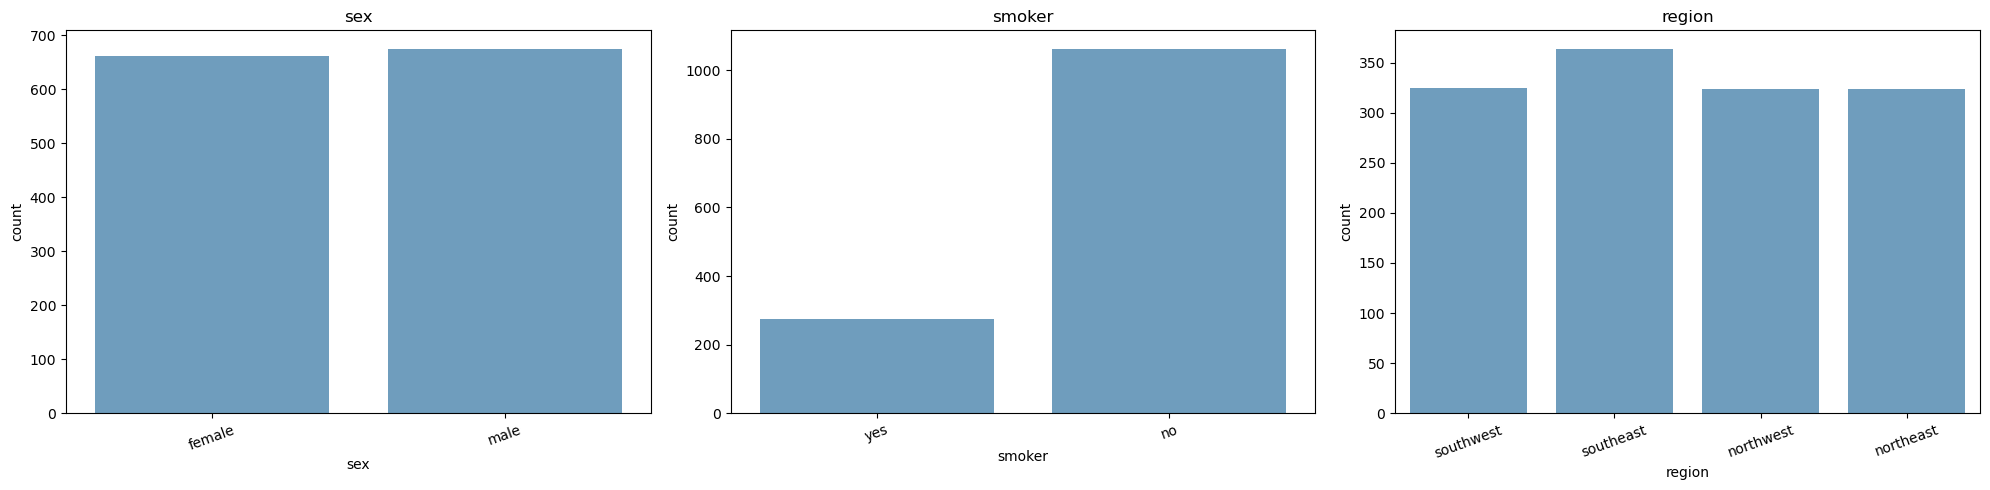

In [129]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(20, 5))

for i, ax in enumerate(axes):
    if i < len(df_not_num.columns):
        column = df_not_num.columns[i]
        sns.countplot(x=column, alpha=0.7, data=df_not_num, ax=ax)
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=20)
        # Add a title to each subplot
        ax.set_title(column)

fig.tight_layout()
plt.show()

In [131]:
#Scatterplot and Correlation Plot

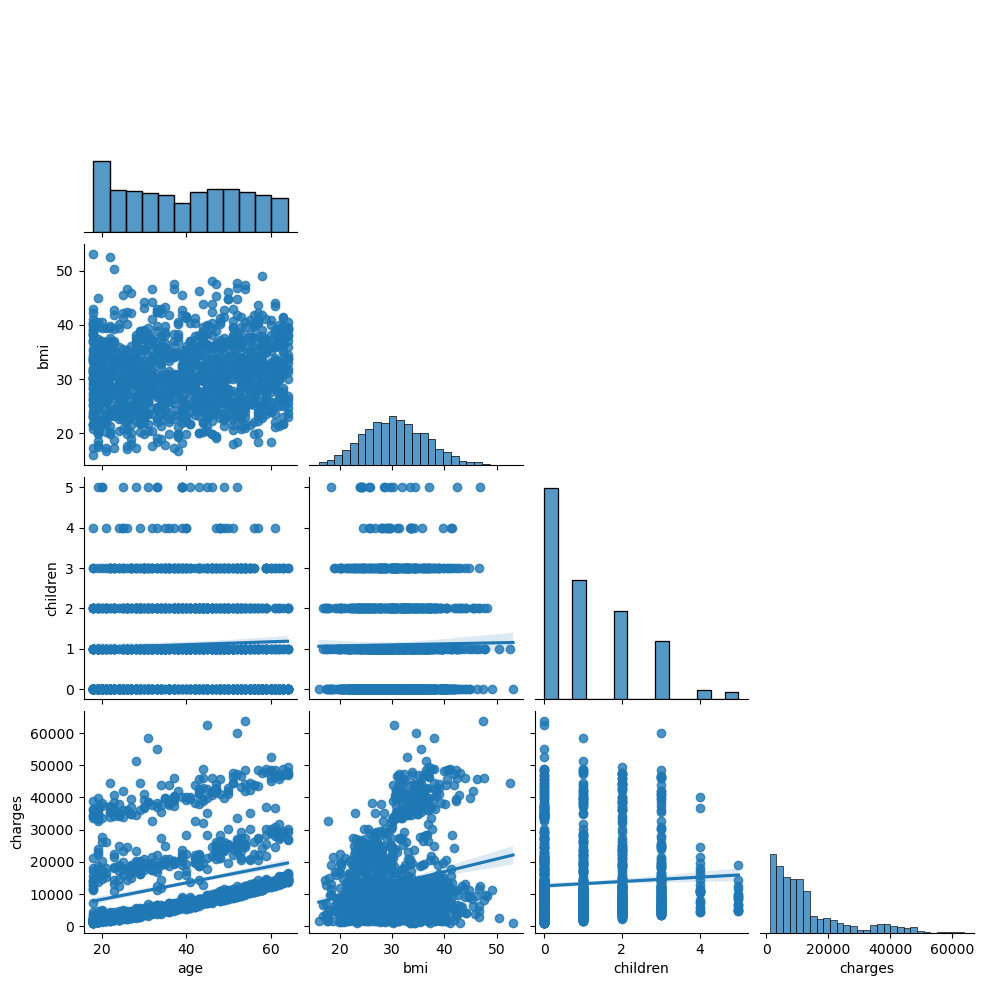

In [133]:
sns.pairplot(df, kind='reg', corner=True)

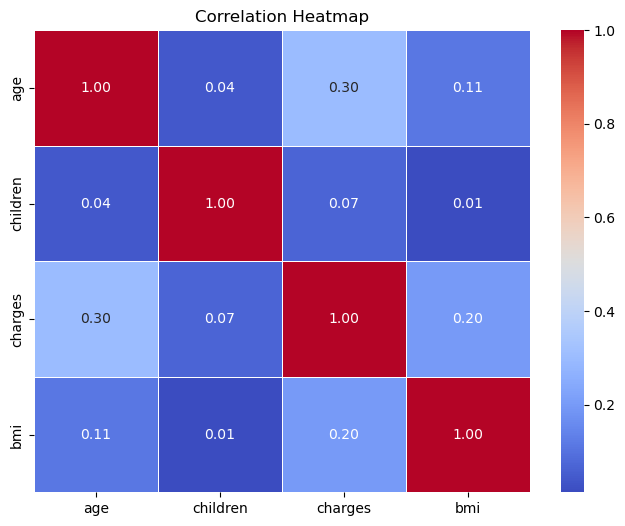

In [134]:

# Calculate the correlation matrix
corr_matrix = df_quant_values.corr(method='pearson')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [135]:
#SECTION: FEATURE ENGINEERING

In [139]:
#One Hot-encoding and standardization approaches

In [141]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [143]:
categorical_columns = ['sex', 'smoker', 'region']
encoder = OneHotEncoder(sparse_output=False, drop='first')

In [145]:
encoded_data = encoder.fit_transform(df[categorical_columns])

In [147]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

In [149]:
final_data =pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis =1)
print(final_data.head())

    age     bmi  children      charges  sex_male  smoker_yes  \
0  19.0  27.900       0.0  16884.92400       0.0         1.0   
1  18.0  33.770       1.0   1725.55230       1.0         0.0   
2  28.0  33.000       3.0   4449.46200       1.0         0.0   
3  33.0  22.705       0.0  21984.47061       1.0         0.0   
4  32.0  28.880       0.0   3866.85520       1.0         0.0   

   region_northwest  region_southeast  region_southwest  
0               0.0               0.0               1.0  
1               0.0               1.0               0.0  
2               0.0               1.0               0.0  
3               1.0               0.0               0.0  
4               1.0               0.0               0.0  


In [151]:
# Identify numerical features to scale
numerical_features = ['age', 'bmi', 'children']

# Scale numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df[numerical_features]

,age,bmi,children
0,-1.440418,-0.453160,-0.909234
1,-1.511647,0.509422,-0.079442
2,-0.799350,0.383155,1.580143
3,-0.443201,-1.305052,-0.909234
4,-0.514431,-0.292456,-0.909234
...,...,...,...
1333,0.767704,0.050269,1.580143
1334,-1.511647,0.206053,-0.909234
1335,-1.511647,1.014490,-0.909234
1336,-1.297958,-0.797524,-0.909234


In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


In [160]:
# Define features and target variable
X = df.drop('charges', axis=1)
y = df['charges']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'children']),
        ('cat', OneHotEncoder(drop='first'), ['sex', 'smoker', 'region'])
    ]
)

# Apply preprocessing to features
X_processed = preprocessor.fit_transform(X)

In [162]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (1069, 8)
Testing set size: (268, 8)


In [164]:
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [ 3484.65005147  1943.50085058   642.34126147  -101.54205399
 23077.76459287  -391.76145478  -838.91961573  -659.13975155]
Model Intercept: 8999.227981875696


In [167]:
# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate performance using R² and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R² Score: {r2:.3f}")
print(f"RMSE: ${rmse:,.2f}")

R² Score: 0.807
RMSE: $5,956.34


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


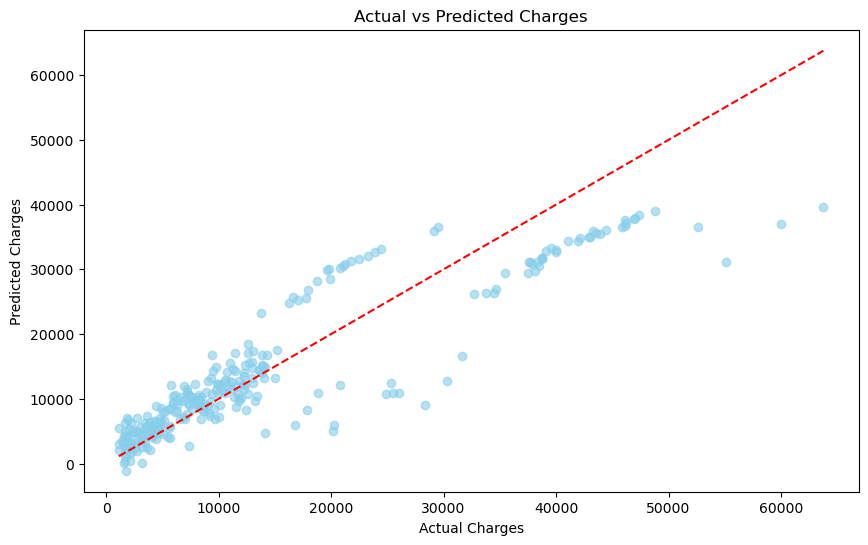

In [173]:
# Plot actual vs predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line (y=x)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

In [187]:
import joblib
joblib.dump(model, 'insurance_model.pkl')
joblib.dump(preprocessor, 'insurance_preprocessor.pkl')

['insurance_preprocessor.pkl']

In [189]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load the trained model and preprocessor
model = joblib.load('insurance_model.pkl')
preprocessor = joblib.load('insurance_preprocessor.pkl')

# Set title and introduction
st.title("Insurance Charges Predictor")
st.markdown("Welcome to the Insurance Charges Predictor!")
st.write("Enter the details below to predict insurance charges:")

# Input fields
max_age = 100
min_age = 18

left, right = st.columns(2)   
with left:     
    smoker = st.radio('Are you a smoker or not?', options=['yes', 'no'], horizontal=True)
    age = st.slider("What is your age?", min_value=min_age, max_value=max_age, value=30, help="Age should be between 18 and 100.")
    sex = st.radio('What is your gender?', options=['male', 'female'], horizontal=True)
with right:     
    bmi = st.number_input("Please enter your BMI", min_value=10.0, max_value=60.0, value=25.0, step=0.1, help="BMI should be between 10 and 60.")
    children = st.number_input("Number of Children", min_value=0, max_value=5, value=0, help="Number of children should be between 0 and 5.")
    region = st.selectbox("Which Region do you live in?", options=['northeast','northwest', 'southeast', 'southwest'], help="Please select a valid region.")

# Button to predict charges
if st.button("Predict Charges"):
    try:
        # User inputs
        input_df = pd.DataFrame({
            'age': [age],
            'sex': [sex],
            'bmi': [bmi],
            'children':[children],
            'smoker':[smoker],
            'region':[region]
        })

        # Transform data
        input_processed = preprocessor.transform(input_df)

        # Predict charges
        prediction = model.predict(input_processed)[0]
    

        # Display result
        st.success(f"Predicted Insurance Charges: ${prediction:,.2f}")
        st.success(f"R² Score: {r2:.3f}")

        # Plot actual vs predicted charges
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.scatter(y_test, y_pred, alpha=0.6, color='skyblue')
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line (y=x)
        ax.set_xlabel('Actual Charges')
        ax.set_ylabel('Predicted Charges')
        ax.set_title('Actual vs Predicted Charges')
        st.pyplot(fig)
    except Exception as e:
        st.error(str(e))
